<a href="https://colab.research.google.com/github/devchang918/EMG-Vowel-Classification/blob/main/EMG_vowel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Load ZM and DAO EMG recordings

In [ ]:
def get_raw_recording(filepath):
  data_dict = {}
  directory = Path(filepath)  # set directory path
  for file in directory.iterdir():
      if file.is_file():
        try:
            data = np.genfromtxt(file, dtype=float, skip_header=6, delimiter='\t',encoding = 'unicode_escape')
            data_dict[file.stem] = data
        except ValueError:
            print('Data is in wrong shape.')
  return data_dict

In [ ]:
zm_datadict = get_raw_recording('/content/drive/MyDrive/BIPN145_final_project/raw_zm')
dao_datadict = get_raw_recording('/content/drive/MyDrive/BIPN145_final_project/raw_dao')

## Removing Null Values and Aligning Time Series

In [ ]:
zm_filename_list = ['a_zm_raw', 'e_zm_raw', 'i_zm_raw', 'o_zm_raw', 'u_zm_raw']
dao_filename_list = ['a_dao_raw', 'e_dao_raw', 'i_dao_raw', 'o_dao_raw', 'u_dao_raw']

for i in range(len(zm_filename_list)):
  zm_filename = zm_filename_list[i]
  dao_filename = dao_filename_list[i]
  zm_datadict[zm_filename] = pd.DataFrame(zm_datadict[zm_filename]).dropna().to_numpy()
  dao_datadict[dao_filename] = pd.DataFrame(dao_datadict[dao_filename]).dropna().to_numpy()

In [ ]:
zm_datadict['a_zm_raw'].shape[0] == dao_datadict['a_dao_raw'].shape[0]

False

In [ ]:
zm_datadict

{'e_zm_raw': array([[ 4.000000e-02, -7.593750e+00],
        [ 4.500000e-02, -4.071875e+00],
        [ 5.000000e-02, -7.193750e+00],
        ...,
        [ 4.906500e+01, -7.234375e+00],
        [ 4.907000e+01, -1.097500e+01],
        [ 4.907500e+01, -1.822500e+01]]),
 'u_zm_raw': array([[ 4.000000e-02, -1.203437e+01],
        [ 4.500000e-02, -8.021875e+00],
        [ 5.000000e-02, -8.578125e+00],
        ...,
        [ 5.858500e+01, -7.318750e+00],
        [ 5.859000e+01, -5.909375e+00],
        [ 5.859500e+01, -1.104687e+01]]),
 'a_zm_raw': array([[  0.08    , -16.70625 ],
        [  0.085   ,  -6.38125 ],
        [  0.09    ,  -7.25625 ],
        ...,
        [ 63.415   ,  -8.903125],
        [ 63.42    ,  -6.640625],
        [ 63.425   ,  -7.603125]]),
 'o_zm_raw': array([[ 4.000000e-02, -5.909375e+00],
        [ 4.500000e-02, -9.990625e+00],
        [ 5.000000e-02, -1.240625e+01],
        ...,
        [ 4.637000e+01, -1.959687e+01],
        [ 4.637500e+01, -1.324375e+01],
        [ 

In [ ]:
for i in range(len(zm_filename_list)):
  min_length = min(zm_datadict[zm_filename_list[i]].shape[0], dao_datadict[dao_filename_list[i]].shape[0])
  zm_datadict[zm_filename_list[i]] = zm_datadict[zm_filename_list[i]][:min_length]
  dao_datadict[dao_filename_list[i]] = dao_datadict[dao_filename_list[i]][:min_length]

In [ ]:
zm_datadict['a_zm_raw'].shape == dao_datadict['a_dao_raw'].shape

True

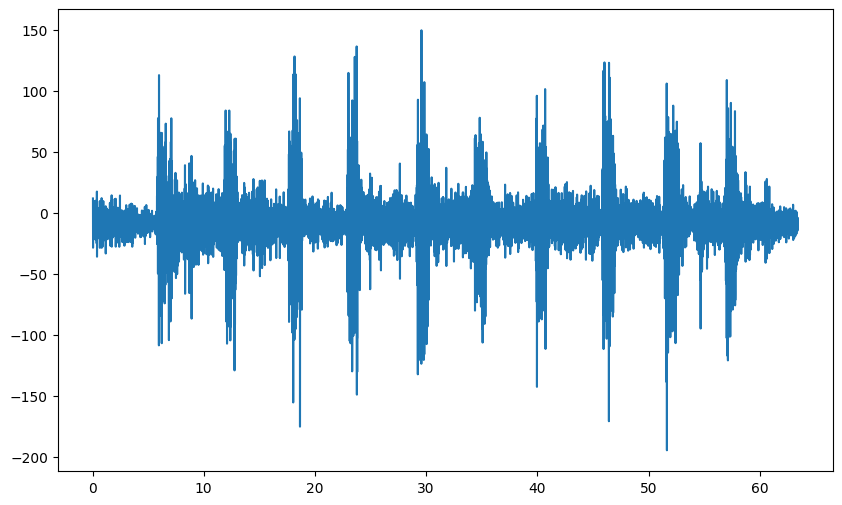

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dao_datadict['a_dao_raw'][:, 0], dao_datadict['a_dao_raw'][:, 1])

## Label Generation

In [ ]:
a_onsets = [5.6, 11.6, 17.22, 22.505, 28.815, 34.155, 39.65, 45.56, 51.105, 56.695]
a_ends = [7.1, 12.99, 18.925, 24.01, 30.43, 35.835, 40.955, 47.25, 52.945, 58.13]
e_onsets = [4.505, 8.75, 12.99, 17.905, 22.28, 26.685, 31.035, 35.025, 39.45, 43.475]
e_ends = [6.16, 10.26, 14.62, 19.405, 23.675, 28.295, 32.695, 36.77, 40.95, 45.26]
i_onsets = [3.81, 8.6, 13.69, 18.085, 22.435, 26.52, 30.795, 34.685, 38.58, 42.945]
i_ends = [5.395, 10.29, 15.19, 19.71, 24.05, 28.075, 32.255, 35.98, 40.005, 44.46]
o_onsets = [3.795, 8.17, 11.91, 15.57, 19.855, 24.34, 28.14, 32.825, 37.16, 41.675]
o_ends = [5.48, 9.555, 13.26, 17.625, 21.28, 25.945, 30.16, 34.49, 38.61, 43.11]
u_onsets = [4.635, 9.355, 14.42, 19.745, 24.955, 30.19, 35.47, 40.61, 47.005, 52.6]
u_ends = [6.055, 10.72, 15.81, 21.21, 26.525, 31.625, 36.925, 42.225, 48.67, 54.305]

In [ ]:
a_labels = np.zeros(zm_datadict['a_zm_raw'].shape[0])
e_labels = np.zeros(zm_datadict['e_zm_raw'].shape[0])
i_labels = np.zeros(zm_datadict['i_zm_raw'].shape[0])
o_labels = np.zeros(zm_datadict['o_zm_raw'].shape[0])
u_labels = np.zeros(zm_datadict['u_zm_raw'].shape[0])

In [ ]:
for i in range(len(a_onsets)):
  for j in range(len(zm_filename_list)):
    zm_dict_temp = zm_datadict[zm_filename_list[j]]
    dao_dict_temp = dao_datadict[dao_filename_list[j]]
    if zm_filename_list[j][0] == 'a':
      a_labels[(zm_dict_temp[:, 0] >= a_onsets[i]) & (zm_dict_temp[:, 0] <= a_ends[i])] = 1
    elif zm_filename_list[j][0] == 'e':
      e_labels[(zm_dict_temp[:, 0] >= e_onsets[i]) & (zm_dict_temp[:, 0] <= e_ends[i])] = 2
    elif zm_filename_list[j][0] == 'i':
      i_labels[(zm_dict_temp[:, 0] >= i_onsets[i]) & (zm_dict_temp[:, 0] <= i_ends[i])] = 3
    elif zm_filename_list[j][0] == 'o':
      o_labels[(zm_dict_temp[:, 0] >= o_onsets[i]) & (zm_dict_temp[:, 0] <= o_ends[i])] = 4
    else:
      u_labels[(zm_dict_temp[:, 0] >= u_onsets[i]) & (zm_dict_temp[:, 0] <= u_ends[i])] = 5

In [ ]:
print(np.unique(a_labels))
print(np.unique(e_labels))
print(np.unique(i_labels))
print(np.unique(o_labels))
print(np.unique(u_labels))

[0. 1.]
[0. 2.]
[0. 3.]
[0. 4.]
[0. 5.]


## Data Preprocessing

In [ ]:
zm_dao_df = pd.DataFrame()
for i in range(len(zm_filename_list)):
  zm_file = zm_filename_list[i]
  dao_file = dao_filename_list[i]
  df = pd.DataFrame({'time': zm_datadict[zm_file][:, 0], 'zm_signal': zm_datadict[zm_file][:, 1]})
  df['dao_signal'] = dao_datadict[dao_file][:, 1]
  if zm_file[0] == 'a':
    df['label'] = a_labels
  elif zm_file[0] == 'e':
    df['label'] = e_labels
  elif zm_file[0] == 'i':
    df['label'] = i_labels
  elif zm_file[0] == 'o':
    df['label'] = o_labels
  else:
    df['label'] = u_labels
  df['time'] = np.arange(len(zm_datadict[zm_file]))
  zm_dao_df = pd.concat([zm_dao_df, df])
zm_dao_df

,time,zm_signal,dao_signal,label
0,0,-16.706250,11.85625,0.0
1,1,-6.381250,-26.90625,0.0
2,2,-7.256250,-28.50000,0.0
3,3,-17.953130,3.71875,0.0
4,4,-7.081250,-2.36875,0.0
...,...,...,...,...
11707,11707,-11.093750,-11.65625,0.0
11708,11708,-12.281250,20.21250,0.0
11709,11709,-7.318750,4.90000,0.0
11710,11710,-5.909375,-15.84375,0.0


In [ ]:
# Identify segments
zm_dao_df['id'] = (zm_dao_df['label'] != zm_dao_df['label'].shift()).cumsum()

# Split into list of dataframes
segments = [group for _, group in zm_dao_df.groupby('id')]

In [ ]:
zm_dao_df = pd.concat(segments)
zm_dao_df

,time,zm_signal,dao_signal,label,id
0,0,-16.706250,11.85625,0.0,1
1,1,-6.381250,-26.90625,0.0,1
2,2,-7.256250,-28.50000,0.0,1
3,3,-17.953130,3.71875,0.0,1
4,4,-7.081250,-2.36875,0.0,1
...,...,...,...,...,...
11707,11707,-11.093750,-11.65625,0.0,101
11708,11708,-12.281250,20.21250,0.0,101
11709,11709,-7.318750,4.90000,0.0,101
11710,11710,-5.909375,-15.84375,0.0,101


In [ ]:
count_lst = []
for df in segments:
  count_lst.append(df['label'].iloc[0])
pd.Series(count_lst).value_counts()

,count
0.0,51
1.0,10
2.0,10
3.0,10
4.0,10
5.0,10


<Axes: ylabel='count'>

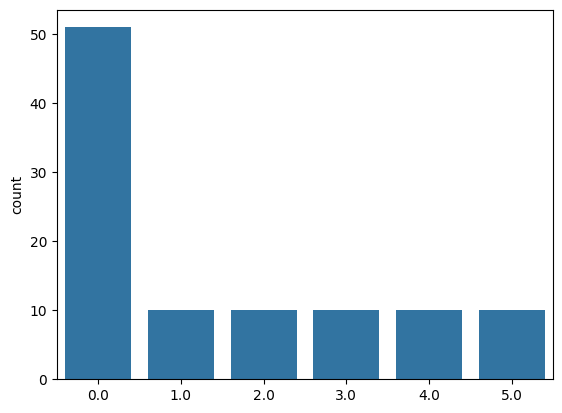

In [ ]:
sns.countplot(x=count_lst)

In [ ]:
zero_indices = [index for index, value in enumerate(count_lst) if value == 0]
print(zero_indices)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


In [ ]:
import random
sample = np.array(random.sample(zero_indices, 41))
sample = sample + 1
sample

array([ 25,  49,  79,  77,  65,  71,  13,  53,  15,  31,  85,   3,  11,
        37,  41,  55,  21,  39,  95,  57,  51,  61,  45,  67,  59,  29,
        19,  23,   9, 101,  73,   7,  81,  33,  91,  17,  47,  83,  89,
        99,  87])

In [ ]:
zm_dao_df = zm_dao_df[~zm_dao_df['id'].isin(sample)]
zm_dao_df

,time,zm_signal,dao_signal,label,id
0,0,-16.70625,11.85625,0.0,1
1,1,-6.38125,-26.90625,0.0,1
2,2,-7.25625,-28.50000,0.0,1
3,3,-17.95313,3.71875,0.0,1
4,4,-7.08125,-2.36875,0.0,1
...,...,...,...,...,...
10849,10849,-11.14375,-7.40000,5.0,100
10850,10850,-7.78125,7.10000,5.0,100
10851,10851,-10.08125,-2.53125,5.0,100
10852,10852,-10.65312,-11.53125,5.0,100


In [ ]:
zm_dao_df['id'].nunique()

60

In [ ]:
X = zm_dao_df.drop(columns=['label'])
y = [count_lst[i-1] for i in zm_dao_df['id'].unique()]

In [ ]:
zm_dao_df['id'].unique()

array([  1,   2,   4,   5,   6,   8,  10,  12,  14,  16,  18,  20,  22,
        24,  26,  27,  28,  30,  32,  34,  35,  36,  38,  40,  42,  43,
        44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  63,  64,  66,
        68,  69,  70,  72,  74,  75,  76,  78,  80,  82,  84,  86,  88,
        90,  92,  93,  94,  96,  97,  98, 100])

## Feature Extraction

In [ ]:
!pip install tsfresh
# !uv pip install -q --system numba-cuda==0.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.1 MB/s eta 0:00:00


In [ ]:
# from numba import config
# config.CUDA_ENABLE_PYNVJITLINK = 1
# config.CUDA_LOW_OCCUPANCY_WARNINGS = 0

In [ ]:
from tsfresh import extract_features#, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute

In [ ]:
df_features = extract_features(timeseries_container=X,
                               column_id='id',
                               column_sort='time',
                               n_jobs=8)

Feature Extraction: 100%|██████████| 40/40 [00:08<00:00,  4.94it/s]


In [ ]:
df_features.rename_axis('id', inplace=True)

In [ ]:
print(df_features.shape)
df_features

(60, 1566)


,dao_signal__variance_larger_than_standard_deviation,dao_signal__has_duplicate_max,dao_signal__has_duplicate_min,dao_signal__has_duplicate,dao_signal__sum_values,dao_signal__abs_energy,dao_signal__mean_abs_change,dao_signal__mean_change,dao_signal__mean_second_derivative_central,dao_signal__median,...,zm_signal__fourier_entropy__bins_5,zm_signal__fourier_entropy__bins_10,zm_signal__fourier_entropy__bins_100,zm_signal__permutation_entropy__dimension_3__tau_1,zm_signal__permutation_entropy__dimension_4__tau_1,zm_signal__permutation_entropy__dimension_5__tau_1,zm_signal__permutation_entropy__dimension_6__tau_1,zm_signal__permutation_entropy__dimension_7__tau_1,zm_signal__query_similarity_count__query_None__threshold_0.0,zm_signal__mean_n_absolute_max__number_of_maxima_7
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,1.0,-8936.18125,1.213644e+05,6.492044,-0.016500,0.019311,-8.003125,...,1.119861,1.789494,3.731951,1.768372,3.074666,4.571993,5.980612,6.774579,NaN,18.873213
2,1.0,0.0,0.0,1.0,-2572.86865,3.587644e+05,32.901062,0.101062,0.141994,-8.737500,...,0.655353,1.158153,2.999167,1.778898,3.073043,4.471300,5.377626,5.635283,NaN,71.082140
4,1.0,0.0,0.0,1.0,-2761.83750,3.374913e+05,34.626169,0.035207,-0.009533,-8.856250,...,1.029053,1.627121,3.444779,1.771877,3.083708,4.465112,5.306981,5.563770,NaN,59.180354
5,1.0,0.0,0.0,1.0,-6030.66250,1.413731e+05,10.481931,0.028525,-0.017145,-6.743750,...,1.088238,1.751414,3.649243,1.758523,3.060317,4.539560,5.875214,6.506216,NaN,22.964283
6,1.0,0.0,0.0,1.0,-3204.58130,4.755880e+05,35.699413,0.055095,0.018989,-8.575000,...,1.116635,1.754716,3.568484,1.781646,3.104652,4.514395,5.483693,5.746971,NaN,50.184820
8,1.0,0.0,0.0,1.0,-3441.36865,5.005275e+05,36.973110,0.001682,0.020708,-9.521875,...,0.930038,1.490437,3.294344,1.779576,3.067576,4.427809,5.341805,5.610741,NaN,63.173659
10,1.0,0.0,0.0,1.0,-3176.88125,4.593196e+05,36.065750,0.060449,0.008453,-7.796875,...,0.805007,1.301974,3.143294,1.763332,3.064481,4.499510,5.395142,5.701020,NaN,50.037051
12,1.0,0.0,0.0,0.0,-2886.11245,3.165150e+05,29.973381,0.034542,0.033237,-7.618750,...,1.093741,1.676224,3.267392,1.787535,3.143858,4.583217,5.476206,5.743484,NaN,50.107587
14,1.0,0.0,0.0,0.0,-2960.90610,3.599914e+05,35.254501,0.040086,0.023846,-8.309375,...,0.831959,1.286683,3.097234,1.768902,3.086316,4.438678,5.238146,5.472736,NaN,69.276784


In [ ]:
df_features.columns

Index(['dao_signal__variance_larger_than_standard_deviation',
       'dao_signal__has_duplicate_max', 'dao_signal__has_duplicate_min',
       'dao_signal__has_duplicate', 'dao_signal__sum_values',
       'dao_signal__abs_energy', 'dao_signal__mean_abs_change',
       'dao_signal__mean_change', 'dao_signal__mean_second_derivative_central',
       'dao_signal__median',
       ...
       'zm_signal__fourier_entropy__bins_5',
       'zm_signal__fourier_entropy__bins_10',
       'zm_signal__fourier_entropy__bins_100',
       'zm_signal__permutation_entropy__dimension_3__tau_1',
       'zm_signal__permutation_entropy__dimension_4__tau_1',
       'zm_signal__permutation_entropy__dimension_5__tau_1',
       'zm_signal__permutation_entropy__dimension_6__tau_1',
       'zm_signal__permutation_entropy__dimension_7__tau_1',
       'zm_signal__query_similarity_count__query_None__threshold_0.0',
       'zm_signal__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=1566)

## Training Classifier

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [ ]:
df_features

,dao_signal__variance_larger_than_standard_deviation,dao_signal__has_duplicate_max,dao_signal__has_duplicate_min,dao_signal__has_duplicate,dao_signal__sum_values,dao_signal__abs_energy,dao_signal__mean_abs_change,dao_signal__mean_change,dao_signal__mean_second_derivative_central,dao_signal__median,...,zm_signal__fourier_entropy__bins_5,zm_signal__fourier_entropy__bins_10,zm_signal__fourier_entropy__bins_100,zm_signal__permutation_entropy__dimension_3__tau_1,zm_signal__permutation_entropy__dimension_4__tau_1,zm_signal__permutation_entropy__dimension_5__tau_1,zm_signal__permutation_entropy__dimension_6__tau_1,zm_signal__permutation_entropy__dimension_7__tau_1,zm_signal__query_similarity_count__query_None__threshold_0.0,zm_signal__mean_n_absolute_max__number_of_maxima_7
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,1.0,-8936.18125,1.213644e+05,6.492044,-0.016500,0.019311,-8.003125,...,1.119861,1.789494,3.731951,1.768372,3.074666,4.571993,5.980612,6.774579,NaN,18.873213
2,1.0,0.0,0.0,1.0,-2572.86865,3.587644e+05,32.901062,0.101062,0.141994,-8.737500,...,0.655353,1.158153,2.999167,1.778898,3.073043,4.471300,5.377626,5.635283,NaN,71.082140
4,1.0,0.0,0.0,1.0,-2761.83750,3.374913e+05,34.626169,0.035207,-0.009533,-8.856250,...,1.029053,1.627121,3.444779,1.771877,3.083708,4.465112,5.306981,5.563770,NaN,59.180354
5,1.0,0.0,0.0,1.0,-6030.66250,1.413731e+05,10.481931,0.028525,-0.017145,-6.743750,...,1.088238,1.751414,3.649243,1.758523,3.060317,4.539560,5.875214,6.506216,NaN,22.964283
6,1.0,0.0,0.0,1.0,-3204.58130,4.755880e+05,35.699413,0.055095,0.018989,-8.575000,...,1.116635,1.754716,3.568484,1.781646,3.104652,4.514395,5.483693,5.746971,NaN,50.184820
8,1.0,0.0,0.0,1.0,-3441.36865,5.005275e+05,36.973110,0.001682,0.020708,-9.521875,...,0.930038,1.490437,3.294344,1.779576,3.067576,4.427809,5.341805,5.610741,NaN,63.173659
10,1.0,0.0,0.0,1.0,-3176.88125,4.593196e+05,36.065750,0.060449,0.008453,-7.796875,...,0.805007,1.301974,3.143294,1.763332,3.064481,4.499510,5.395142,5.701020,NaN,50.037051
12,1.0,0.0,0.0,0.0,-2886.11245,3.165150e+05,29.973381,0.034542,0.033237,-7.618750,...,1.093741,1.676224,3.267392,1.787535,3.143858,4.583217,5.476206,5.743484,NaN,50.107587
14,1.0,0.0,0.0,0.0,-2960.90610,3.599914e+05,35.254501,0.040086,0.023846,-8.309375,...,0.831959,1.286683,3.097234,1.768902,3.086316,4.438678,5.238146,5.472736,NaN,69.276784


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, random_state=4)

### Fitting Logistic Regression Model

In [ ]:
df_features_dropna = df_features.dropna(axis=1)

In [ ]:
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
lr_cv_score = cross_val_score(lr_clf, df_features_dropna, y, cv=5)
lr_mean_cv_score = lr_cv_score.mean()
print(f"Mean cross-validation score: {lr_mean_cv_score}")
lr_cv_score

Mean cross-validation score: 0.8


array([0.83333333, 0.75      , 0.75      , 0.83333333, 0.83333333])

In [ ]:
predictions = cross_val_predict(lr_clf, df_features_dropna, y, cv=5)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.54      0.70      0.61        10
         2.0       0.70      0.70      0.70        10
         3.0       0.86      0.60      0.71        10
         4.0       0.83      1.00      0.91        10
         5.0       1.00      0.80      0.89        10

    accuracy                           0.80        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.82      0.80      0.80        60



### Fitting Decision Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=20, random_state=0)
dt_cv_score = cross_val_score(dt_clf, df_features, y, cv=5)
dt_mean_cv_score = dt_cv_score.mean()
print(f"Mean cross-validation score: {dt_mean_cv_score}")
dt_cv_score

Mean cross-validation score: 0.8666666666666666


array([0.91666667, 0.83333333, 0.91666667, 0.83333333, 0.83333333])

In [ ]:
predictions = cross_val_predict(dt_clf, df_features, y, cv=5)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.67      0.80      0.73        10
         2.0       0.80      0.80      0.80        10
         3.0       1.00      0.60      0.75        10
         4.0       1.00      1.00      1.00        10
         5.0       0.83      1.00      0.91        10

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.86        60
weighted avg       0.88      0.87      0.86        60



### Fitting Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_cv_score = cross_val_score(rf_clf, df_features, y, cv=5)
rf_mean_cv_score = rf_cv_score.mean()
print(f"Mean cross-validation score: {rf_mean_cv_score}")
rf_cv_score

Mean cross-validation score: 0.9666666666666666


array([1.        , 1.        , 0.91666667, 1.        , 0.91666667])

In [ ]:
predictions = cross_val_predict(rf_clf, df_features, y, cv=5)
print(classification_report(y, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      0.90      0.90        10
         2.0       0.90      0.90      0.90        10
         3.0       1.00      1.00      1.00        10
         4.0       1.00      1.00      1.00        10
         5.0       1.00      1.00      1.00        10

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
def labels_to_vowels(arr):
  vowels = []
  for label in arr:
    if label == 0:
      vowels.append('resting')
    elif label == 1:
      vowels.append('a')
    elif label == 2:
      vowels.append('e')
    elif label == 3:
      vowels.append('i')
    elif label == 4:
      vowels.append('o')
    else:
      vowels.append('u')
  return np.array(vowels)

## Plots

In [ ]:
cr_dict = classification_report(y, predictions, output_dict=True)

f1_scores = []
for key in list(cr_dict.keys())[:6]:
  f1_scores.append(cr_dict[key]['f1-score'])

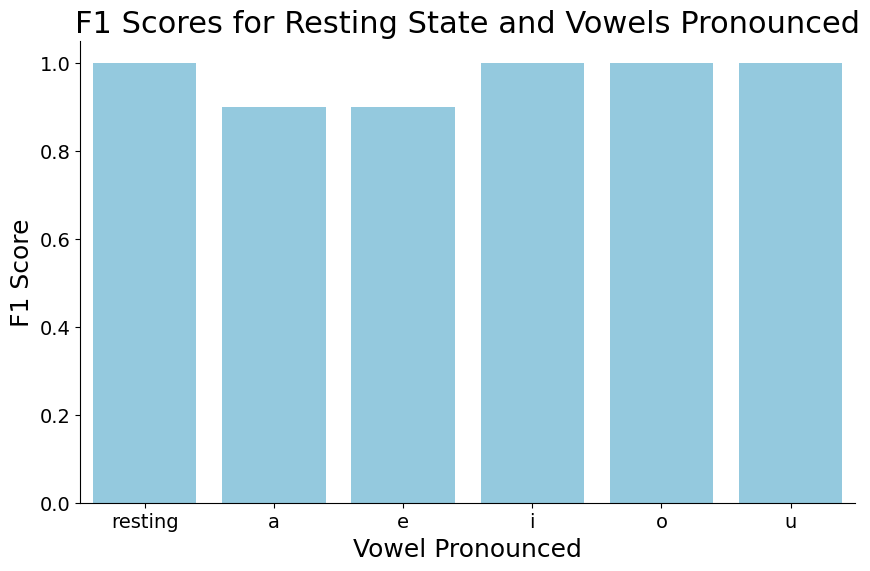

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['resting', 'a', 'e', 'i', 'o', 'u'], y=f1_scores, color='skyblue')
sns.despine()
plt.title('F1 Scores for Resting State and Vowels Pronounced', fontsize = 22)
plt.xlabel('Vowel Pronounced', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(12, 6)

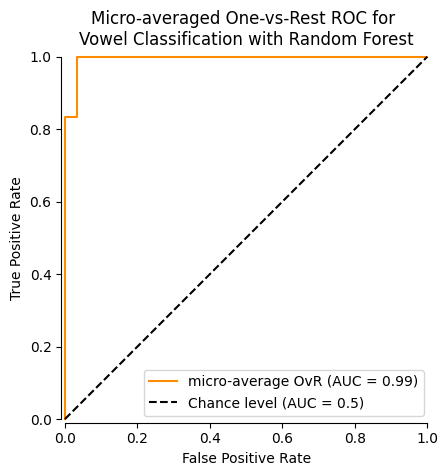

In [ ]:
y_score = rf_clf.fit(X_train, y_train).predict_proba(X_test)

display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC for \nVowel Classification with Random Forest",
)

## Demonstration

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
X_test

,dao_signal__variance_larger_than_standard_deviation,dao_signal__has_duplicate_max,dao_signal__has_duplicate_min,dao_signal__has_duplicate,dao_signal__sum_values,dao_signal__abs_energy,dao_signal__mean_abs_change,dao_signal__mean_change,dao_signal__mean_second_derivative_central,dao_signal__median,...,zm_signal__fourier_entropy__bins_5,zm_signal__fourier_entropy__bins_10,zm_signal__fourier_entropy__bins_100,zm_signal__permutation_entropy__dimension_3__tau_1,zm_signal__permutation_entropy__dimension_4__tau_1,zm_signal__permutation_entropy__dimension_5__tau_1,zm_signal__permutation_entropy__dimension_6__tau_1,zm_signal__permutation_entropy__dimension_7__tau_1,zm_signal__query_similarity_count__query_None__threshold_0.0,zm_signal__mean_n_absolute_max__number_of_maxima_7
id,,,,,,,,,,,,,,,,,,,,,
6,1.0,0.0,0.0,1.0,-3204.58130,475588.020455,35.699413,0.055095,0.018989,-8.575000,...,1.116635,1.754716,3.568484,1.781646,3.104652,4.514395,5.483693,5.746971,NaN,50.184820
35,1.0,0.0,0.0,1.0,-3880.85625,53728.620664,6.964265,0.029108,0.004137,-8.187500,...,0.991785,1.614960,3.579838,1.781350,3.103878,4.555656,5.624940,6.012001,NaN,21.484820
96,1.0,0.0,0.0,1.0,-2344.83720,501827.588457,36.750425,-0.032430,-0.016790,-7.143750,...,1.019363,1.600817,3.559137,1.768313,3.082416,4.450885,5.366635,5.649775,NaN,35.087497
42,1.0,0.0,0.0,1.0,-3426.11860,745753.413060,45.189164,-0.007302,0.003961,-7.925000,...,0.466120,0.961381,2.664413,1.786834,3.096592,4.505634,5.389156,5.669494,NaN,87.262497
22,1.0,0.0,0.0,1.0,-3114.06875,328804.758340,28.730362,-0.002115,0.020208,-9.375000,...,0.658457,1.213722,2.942859,1.777138,3.083384,4.495249,5.361400,5.691739,NaN,39.563837
48,1.0,0.0,0.0,1.0,-2730.51235,875345.851922,50.406886,0.037384,0.012976,-6.893750,...,0.713149,1.236973,3.008171,1.761092,3.079290,4.509549,5.409603,5.666144,NaN,90.753571
62,1.0,0.0,0.0,1.0,-2592.33125,76495.288867,10.875223,-0.025556,-0.025288,-7.859375,...,0.875784,1.497129,3.468348,1.782127,3.099020,4.518918,5.433649,5.736750,NaN,20.976337
56,1.0,0.0,0.0,1.0,-2648.61255,796745.354131,58.204472,0.066586,0.017407,-7.721875,...,1.004010,1.539628,3.424911,1.783836,3.120568,4.476887,5.246284,5.488845,NaN,85.175890
10,1.0,0.0,0.0,1.0,-3176.88125,459319.636648,36.065750,0.060449,0.008453,-7.796875,...,0.805007,1.301974,3.143294,1.763332,3.064481,4.499510,5.395142,5.701020,NaN,50.037051


In [ ]:
print(f'Target answers: {labels_to_vowels(np.array(rf_clf.predict(X_test)))}')

Target answers: ['e' 'resting' 'u' 'i' 'e' 'i' 'o' 'i' 'a' 'o' 'e' 'resting']


In [ ]:
print(f'Target answers: {labels_to_vowels(np.array(y_test))}')

Target answers: ['a' 'resting' 'u' 'i' 'e' 'i' 'o' 'i' 'a' 'o' 'a' 'resting']
